In [ ]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt
import numpy as np

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
# Import MINST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**OUR CODE**

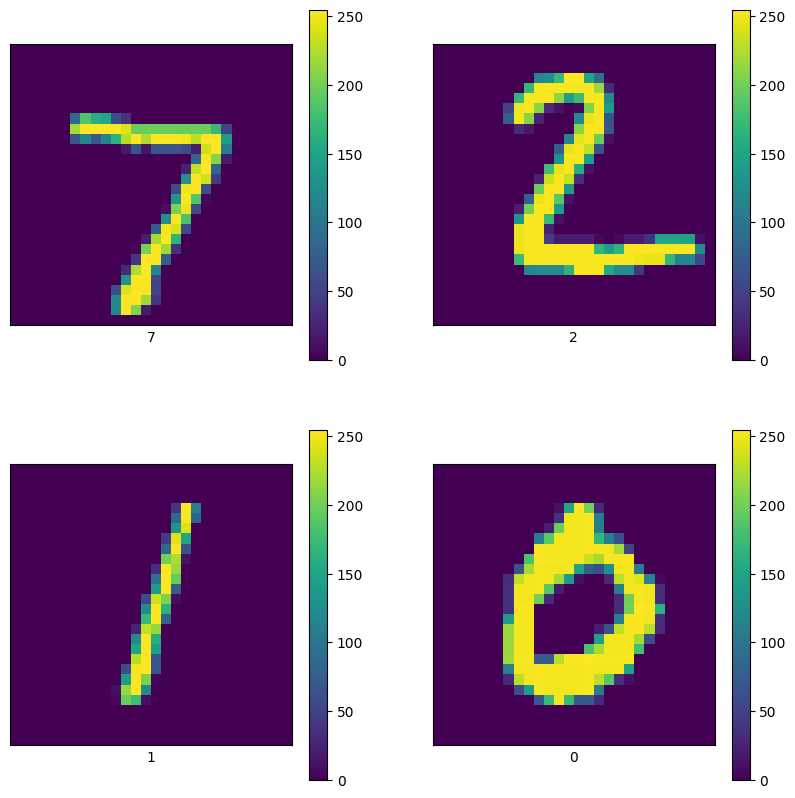

In [ ]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel(y_test[i])
    plt.colorbar()

In [ ]:
# normalization
x_train = x_train / 255.0
x_test = x_test / 255.0

**OUR CODE**

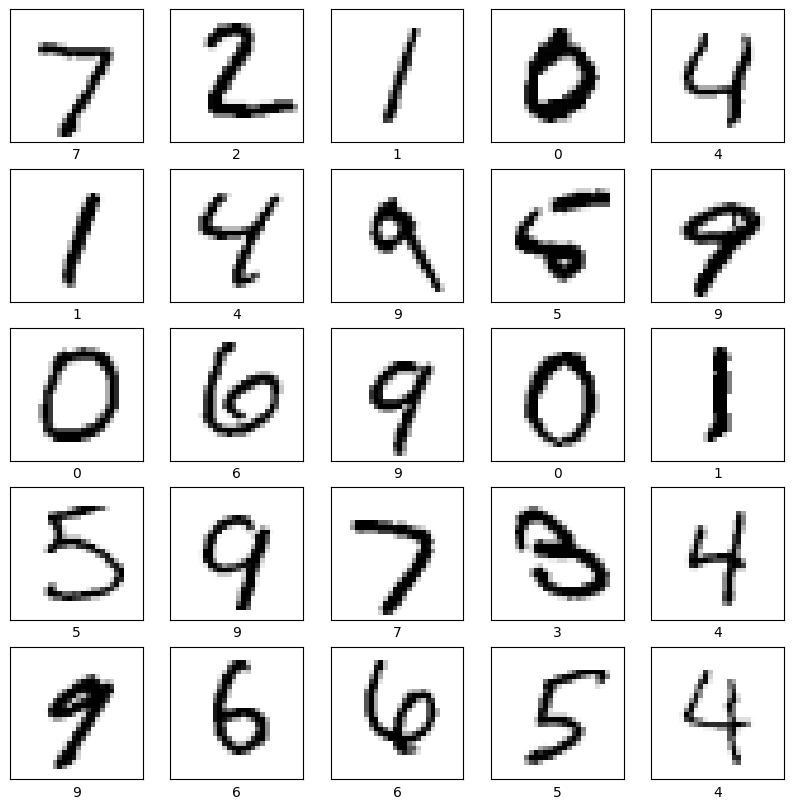

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(y_test[i])

In [ ]:
# Parameters
learning_rate = 0.0055
training_epochs = 15
batch_size = 100
display_step = 1

In [ ]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_hidden_3 = 128
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)

In [ ]:
# reshape MINST data
ds_train = x_train.reshape(x_train.shape[0], n_input)
ds_test = x_test.reshape(x_test.shape[0], n_input)
label_test=np.zeros(shape=(y_test.shape[0],n_classes),dtype="float32")
for k in range(y_test.shape[0]):
  label_test[k][y_test[k]]=1.0

In [ ]:
# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

In [ ]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [ ]:
# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with ELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.elu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Hidden layer with RELU activation
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    layer_3 = tf.nn.tanh(layer_3)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_3, weights['out']) + biases['out']
    return out_layer

AdamOptimizer
Epoch: 0001 cost= 3.197748492
Epoch: 0002 cost= 1.318603486
Epoch: 0003 cost= 1.177595604
Epoch: 0004 cost= 1.170577555
Epoch: 0005 cost= 1.253075989
Epoch: 0006 cost= 1.140184599
Epoch: 0007 cost= 1.201727895
Epoch: 0008 cost= 1.092114774
Epoch: 0009 cost= 1.093869165
Epoch: 0010 cost= 1.086200209
Epoch: 0011 cost= 1.044691840
Epoch: 0012 cost= 0.993001936
Epoch: 0013 cost= 0.884771943
Epoch: 0014 cost= 0.835643913
Epoch: 0015 cost= 0.888769748
Optimization Finished!
Accuracy: 0.7533
Предсказанный класс: 4
Вероятности для всех классов:
[ 8.121628  -7.8678536  5.8332367  3.8172052 11.4801445  9.960206
 10.298716   7.3784666  8.343651  11.192692 ]
AdagradOptimizer
Epoch: 0001 cost= 8.408761944
Epoch: 0002 cost= 5.773433741
Epoch: 0003 cost= 4.786262531
Epoch: 0004 cost= 4.204528176
Epoch: 0005 cost= 3.811094333
Epoch: 0006 cost= 3.515725797
Epoch: 0007 cost= 3.288322580
Epoch: 0008 cost= 3.087542576
Epoch: 0009 cost= 2.937982498
Epoch: 0010 cost= 2.821842075
Epoch: 0011 co

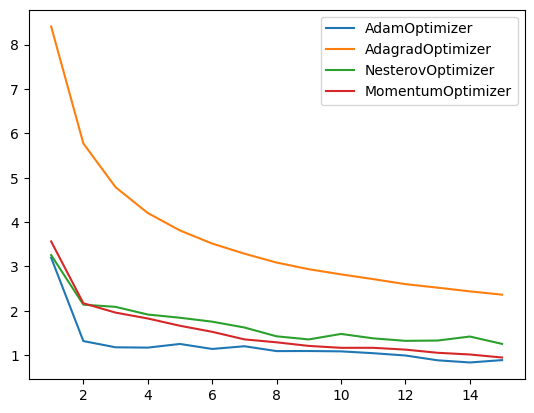

In [ ]:
from PIL import Image
import numpy as np

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimisers = [
    tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost),
    tf.train.AdagradOptimizer(learning_rate=learning_rate).minimize(cost),
    tf.train.MomentumOptimizer(learning_rate,momentum=0.9, use_nesterov=True).minimize(cost),
    tf.train.MomentumOptimizer(learning_rate,momentum=0.9).minimize(cost)
]

optNames = [
    'AdamOptimizer',
    'AdagradOptimizer',
    'NesterovOptimizer',
    'MomentumOptimizer'
]

for opter, optName in zip(optimisers, optNames):
  # Initializing the variables
  init = tf.global_variables_initializer()
  print(optName)
  xVal = []
  yVal = []

  # Launch the graph
  with tf.Session() as sess:
    sess.run(init)

    batch_xs=np.zeros(shape=(batch_size,784),dtype="float32")
    # Training cycle
    for epoch in range(training_epochs):
      avg_cost = 0.
      total_batch = int(ds_train.shape[0]/batch_size)
      # Loop over all batches
      for i in range(total_batch):
        batch_ys=np.zeros(shape=(batch_size,n_classes),dtype="float32")
        for k in range(batch_size):
          index = k+batch_size*i
          batch_xs[k] = ds_train[index]
          batch_ys[k][y_train[index]]=1.0
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([opter, cost], feed_dict={x: batch_xs, y: batch_ys})
        # Compute average loss
        avg_cost += c / total_batch
      # Display logs per epoch step
      if epoch % display_step == 0:
        xVal.append(epoch + 1)
        yVal.append(avg_cost)
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
    plt.plot(xVal, yVal, label=optName)
    print("Optimization Finished!")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: ds_test, y: label_test}))
    img = Image.open(f'/content/sample_data/4.bmp')
    img = np.array(img)
    # img = (img.astype('float32')+0)
    img = (img.astype('float32')-1)*-1+0

    single_example = img.reshape(1, 784)

    prediction = sess.run(pred, feed_dict={x: single_example})
    predicted_class = tf.argmax(prediction, 1).eval(session=sess)[0]
    print(f"Предсказанный класс: {predicted_class}")
    #probabilities = tf.nn.argmax(prediction).eval(session=sess)
    print(f"Вероятности для всех классов:\n{prediction[0]}")
plt.legend()
plt.show()